<a href="https://colab.research.google.com/github/dr-mushtaq/Machine-Learning/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Section**</p>



1.   Linear Regression with one Variable
2.   Multivariate Linear Regression
3.   Logistic Regression
4.   Regularization




#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**⭐️Chapter: 1- Linear Regression with one Variable**</p>

In the first part of exercise 1, we're tasked with implementing simple linear regression to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You'd like to figure out what the expected profit of a new food truck might be given only the population of the city that it would be placed in.

Let's start by examining the data which is in a file called "ex1data1.txt" in the "data" directory of my repository above. First we need to import a few libraries.


**Import libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now let's get things rolling. We can use pandas to load the data into a data frame and display the first few rows using the "head" function.

**Load dataseet**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path = os.getcwd() + '/content/drive/MyDrive/Courses /Data Science /Machine Learning/Theory /ML andrew/Dataset/ex1data1.txt'
data = pd.read_csv('/content/drive/MyDrive/Courses /Data Science /Machine Learning/Theory /ML andrew/Dataset/ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Another useful function that pandas provides out-of-the-box is the "describe" function, which calculates some basic statistics on a data set. This is helpful to get a "feel" for the data during the exploratory analysis stage of a project.

In [ ]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Examining stats about your data can be helpful, but sometimes you need to find ways to visualize it too. Fortunately this data set only has one dependent variable, so we can toss it in a scatter plot to get a better idea of what it looks like. We can use the "plot" function provided by pandas for this, which is really just a wrapper for matplotlib.

<Axes: xlabel='Population', ylabel='Profit'>

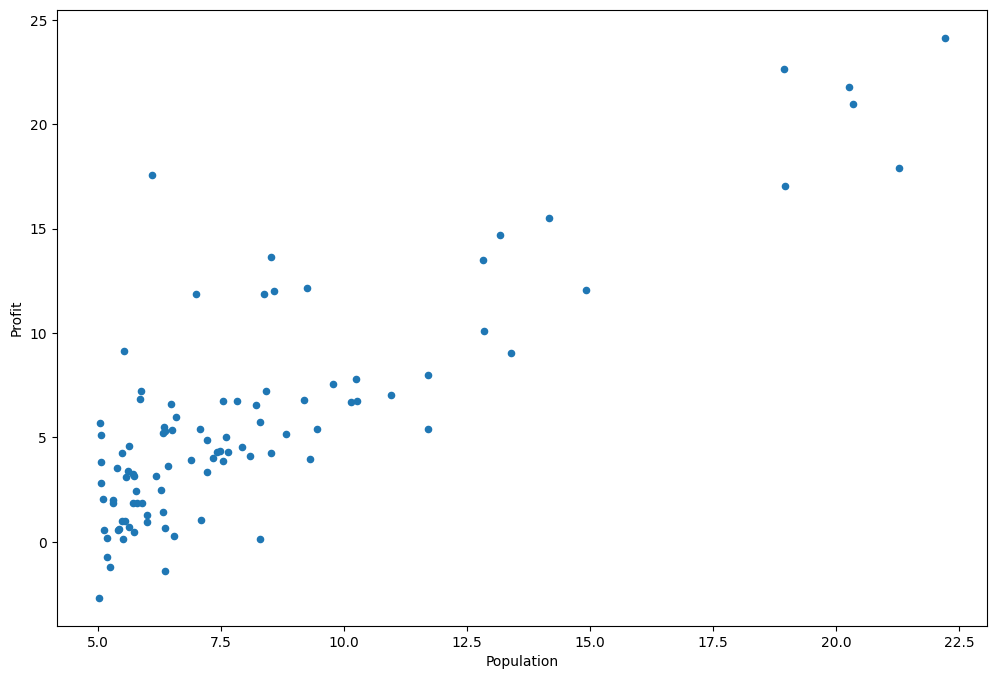

In [ ]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))


It really helps to actually look at what's going on, doesn't it? We can clearly see that there's a cluster of values around cities with smaller populations, and a somewhat linear trend of increasing profit as the size of the city increases. Now let's get to the fun part - implementing a linear regression algorithm in python from scratch!

**Implementing Simple Linear Regression**

If you're not familiar with linear regression, it's an approach to modeling the relationship between a dependent variable and one or more independent variables (if there's one independent variable then it's called simple linear regression, and if there's more than one independent variable then it's called multiple linear regression). There are lots of different types and variances of linear regression that are outside the scope of this discussion so I won't go into that here, but to put it simply - we're trying to create a linear model of the data X, using some number of parameters theta, that describes the variance of the data such that given a new data point that's not in X, we could accurately predict what the outcome y would be without actually knowing what y is.

In this implementation we're going to use an optimization technique called gradient descent to find the parameters theta. If you're familiar with linear algebra, you may be aware that there's another way to find the optimal parameters for a linear model called the "normal equation" which basically solves the problem at once using a series of matrix calculations. However, the issue with this approach is that it doesn't scale very well for large data sets. In contrast, we can use variants of gradient descent and other optimization methods to scale to data sets of unlimited size, so for machine learning problems this approach is more practical.

Okay, that's enough theory. Let's write some code. The first thing we need is a cost function. The cost function evaluates the quality of our model by calculating the error between our model's prediction for a data point, using the model parameters, and the actual data point. For example, if the population for a given city is 4 and we predicted that it was 7, our error is (7-4)^2 = 3^2 = 9 (assuming an L2 or "least squares" loss function). We do this for each data point in X and sum the result to get the cost. Here's the function:

In [ ]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Notice that there are no loops. We're taking advantage of numpy's linear algrebra capabilities to compute the result as a series of matrix operations. This is far more computationally efficient than an unoptimizted "for" loop.

In order to make this cost function work seamlessly with the pandas data frame we created above, we need to do some manipulating. First, we need to insert a column of 1s at the beginning of the data frame in order to make the matrix operations work correctly (I won't go into detail on why this is needed, but it's in the exercise text if you're interested - basically it accounts for the intercept term in the linear equation). Second, we need to separate our data into independent variables X and our dependent variable y.

In [ ]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

In [ ]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

Finally, we're going to convert our data frames to numpy matrices and instantiate a parameter matirx.

In [ ]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

One useful trick to remember when debugging matrix operations is to look at the shape of the matrices you're dealing with. It's also helpful to remember when walking through the steps in your head that matrix multiplications look like (i x j) * (j x k) = (i x k), where i, j, and k are the shapes of the relative dimensions of the matrix.

In [ ]:
X.shape, theta.shape, y.shape


((97, 2), (1, 2), (97, 1))

Okay, so now we can try out our cost function. Remember the parameters were initialized to 0 so the solution isn't optimal yet, but we can see if it works.

In [ ]:
computeCost(X, y, theta)

32.072733877455676

So far so good. Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the exercise text. Here's the function for gradient descent:

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

The idea with gradient descent is that for each iteration, we compute the gradient of the error term in order to figure out the appropriate direction to move our parameter vector. In other words, we're calculating the changes to make to our parameters in order to reduce the error, thus bringing our solution closer to the optimal solution (i.e best fit).

This is a fairly complex topic and I could easily devote a whole blog post just to discussing gradient descent. If you're interested in learning more, I would recommend starting with this article and branching out from there.

Once again we're relying on numpy and linear algebra for our solution. You may notice that my implementation is not 100% optimal. In particular, there's a way to get rid of that inner loop and update all of the parameters at once. I'll leave it up to the reader to figure it out for now (I'll cover it in a later post).

Now that we've got a way to evaluate solutions, and a way to find a good solution, it's time to apply this to our data set.

In [ ]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [ ]:
g

matrix([[-3.24140214,  1.1272942 ]])

matrix([[-3.24140214, 1.1272942 ]])

Note that we've initialized a few new variables here. If you look closely at the gradient descent function, it has parameters called alpha and iters. Alpha is the learning rate - it's a factor in the update rule for the parameters that helps determine how quickly the algorithm will converge to the optimal solution. Iters is just the number of iterations. There is no hard and fast rule for how to initialize these parameters and typically some trial-and-error is involved.

We now have a parameter vector descibing what we believe is the optimal linear model for our data set. One quick way to evaluate just how good our regression model is might be to look at the total error of our new solution on the data set:

In [ ]:
computeCost(X, y, g)

4.515955503078914

**Viewing The Results**

We're now going to use matplotlib to visualize our solution. Remember the scatter plot from before? Let's overlay a line representing our model on top of a scatter plot of the data to see how well it fits. We can use numpy's "linspace" function to create an evenly-spaced series of points within the range of our data, and then "evaluate" those points using our model to see what the expected profit would be. We can then turn it into a line graph and plot it.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

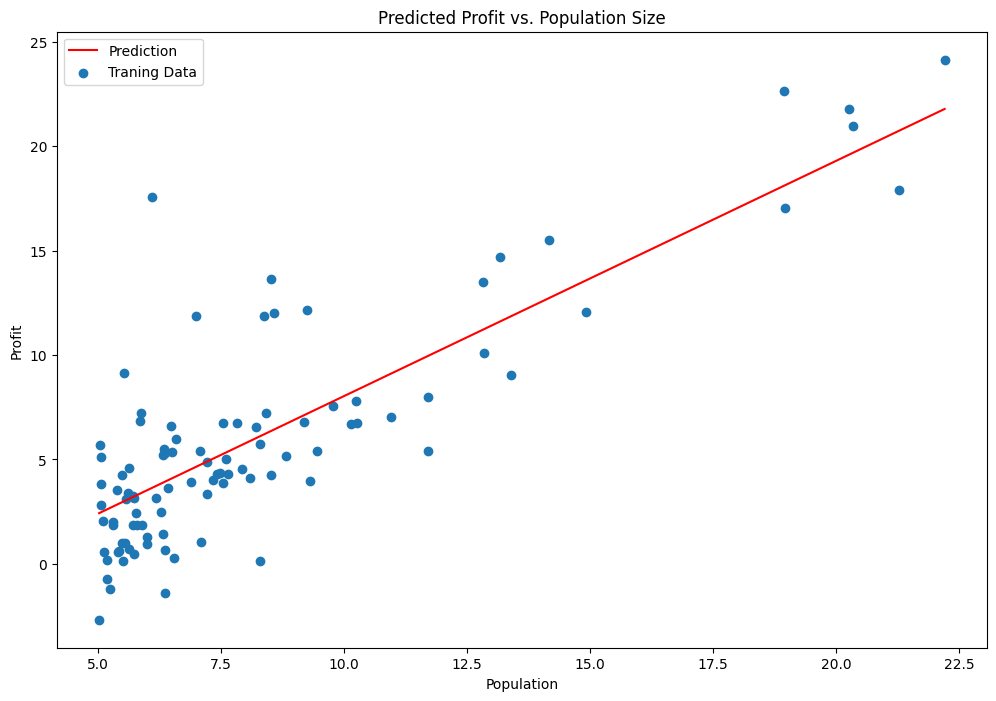

In [ ]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Not bad! Our solution looks like and optimal linear model of the data set. Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.

Text(0.5, 1.0, 'Error vs. Training Epoch')

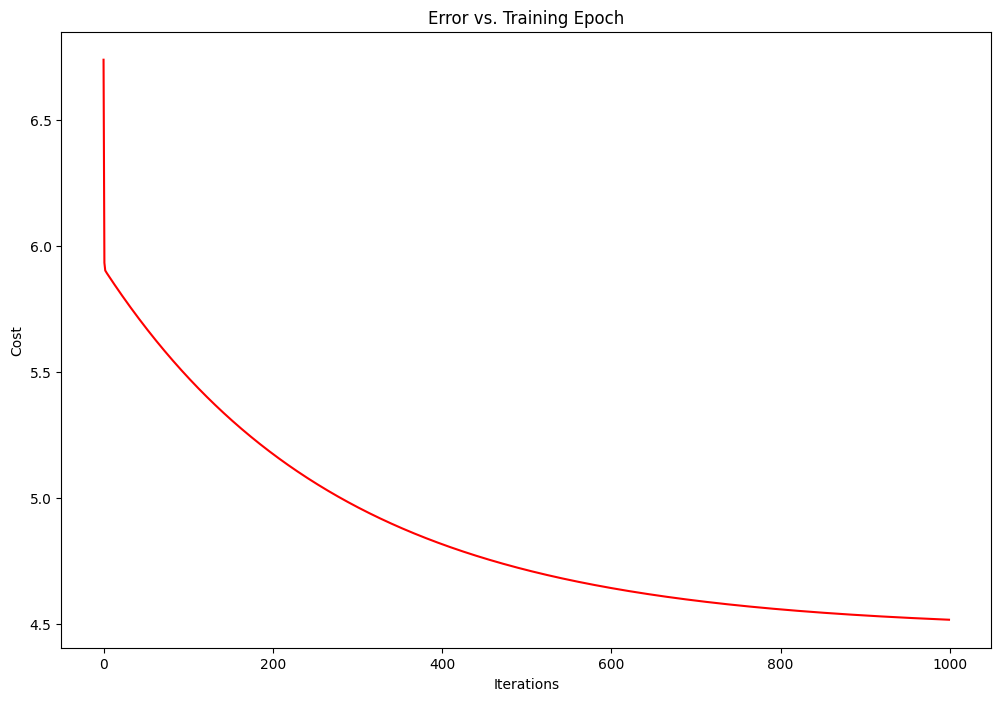

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Notice that the cost always decreases - this is an example of what's called a convex optimization problem. If you were to plot the entire solution space for the problem (i.e. plot the cost as a function of the model parameters for every possible value of the parameters) you would see that it looks like a "bowl" shape with a "basin" representing the optimal solution.

That's all for now! In part 2 we'll finish off the first exercise by extending this example to more than 1 variable. I'll also show how the above solution can be reached by using a popular machine learning library called scikit-learn.

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**⭐️Chapter: 2-Multivariate Linear Regression**</p>

 For part 2 we've got a new task - predict the price that a house will sell for. The difference this time around is we have more than one dependent variable. We're given both the size of the house in square feet, and the number of bedrooms in the house. Can we easily extend our previous code to handle multiple linear regression? Let's find out!

**Import libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data2 = pd.read_csv('/content/drive/MyDrive/Courses /Data Science /Machine Learning/Theory /ML andrew/Dataset/ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. If we were to run our regression algorithm on this data as-is, the "size" variable would be weighted too heavily and would end up dwarfing any contributions from the "number of bedrooms" feature. To fix this, we need to do something called "feature normalization". That is, we need to adjust the scale of the features to level the playing field. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation. Fortunately this is one line of code using pandas.

**Feature normalization**

In [ ]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Next, we need to modify our implementation of linear regression from part 1 to handle more than 1 dependent variable. Or do we? Let's take a look at the code for the gradient descent function again.

**Model Training**

Gradient descent function

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [ ]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Look closely at the line of code calculating the error term: error = (X * theta.T) - y. It might not be obvious at first but we're using all matrix operations! This is the power of linear algebra at work. This code will work correctly no matter how many variables (columns) are in X, as long as the number of parameters in theta agree. Similarly, it will compute the error term for every row in X as long as the number of rows in y agree. On top of that, it's a very efficient calculation. This is a powerful way to apply ANY expression to a large number of instances at once.

Since both our gradient descent and cost function are using matrix operations, there is in fact no change to the code necessary to handle multiple linear regression. Let's test it out. We first need to perform a few initializations to create the appropriate matrices to pass to our functions.

Parameter initializations

In [ ]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))


In [ ]:
alpha = 0.01
iters = 1000

Now we're ready to give it a try. Let's see what happens.



In [ ]:
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

In [ ]:
# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

**Plot the training progress**

Looks promising! We can also plot the training progress to confirm that the error was in fact decreasing with each iteration of gradient descent.

Text(0.5, 1.0, 'Error vs. Training Epoch')

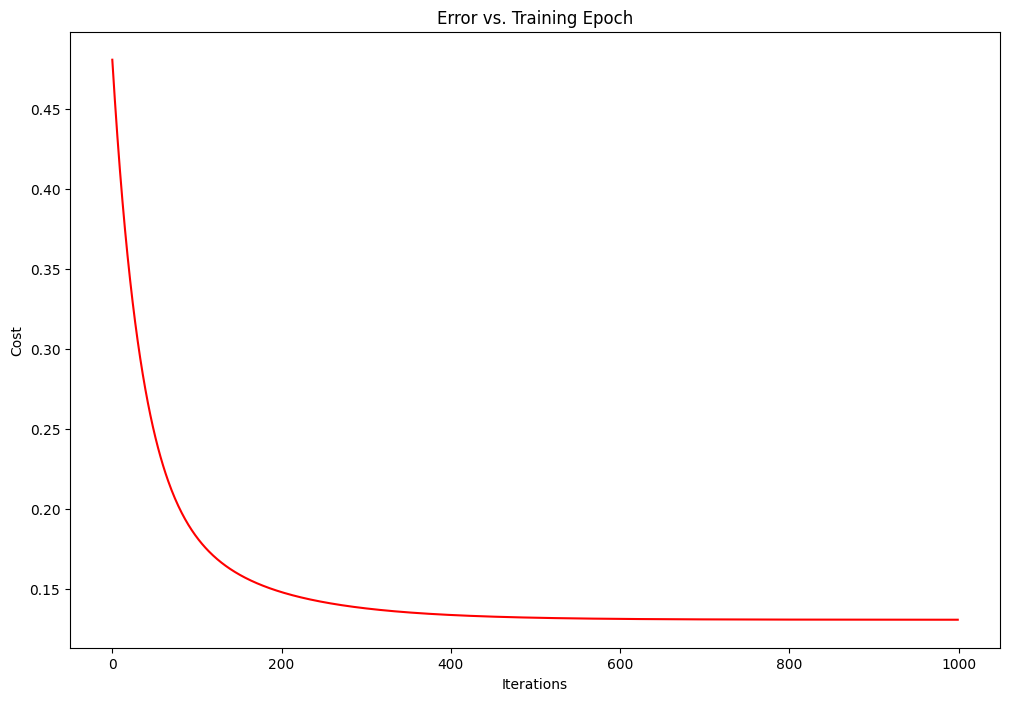

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

The cost, or error of the solution, dropped with each sucessive iteration until it bottomed out. This is exactly what we would expect to happen. It looks like our algorithm worked.

It's worth noting that we don't HAVE to implement any algorithms from scratch to solve this problem. The great thing about Python is its huge developer community and abundance of open-source software. In the machine learning realm, the top Python library is scikit-learn. Let's see how we could have handled our simple linear regression task from part 1 using scikit-learn's linear regression class.

**Normal Equation**

In [ ]:
import numpy as np
def normal_equation(X, y):
 theta = np.linalg.inv(X.T @ X) @ X.T @ y
 return theta
# Example usage:
X = np.array([[1, 2], [1, 3], [1, 4]]) # Features
y = np.array([2, 5, 7]) # Target values
theta = normal_equation(X, y)
print("Optimal parameters:", theta)

Optimal parameters: [-2.83333333  2.5       ]


In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

It doesn't get much easier than that. There are lots of parameters to the "fit" method that we could have tweaked depending on how we want the algorithm to function, but the defaults are sensible enough for our problem that I left them alone. Let's try plotting the fitted parameters to see how it compares to our earlier results.

In [ ]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

AttributeError: 'numpy.ndarray' object has no attribute 'A1'

Notice I'm using the "predict" function to get the predicted y values in order to draw the line. This is much easier than trying to do it manually. Scikit-learn has a great API with lots of convenience functions for typical machine learning workflows. We'll explore some of these in more detail in future posts.

That's it for today. In part 3, we'll take a look at exercise 2 and dive into some classification tasks using logistic regression.


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**⭐️Chapter 3:Logistic Regression**</p>

In part 2 of the series we wrapped up our implementation of multivariate linear regression using gradient descent and applied it to a simple housing prices data set. In this post we’re going to switch our objective from predicting a continuous value (regression) to classifying a result into two or more discrete buckets (classification) and apply it to a student admissions problem. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set. For each training example, you have the applicant's scores on two exams and the admissions decision. To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores using a somewhat confusingly-named technique called logistic regression.

**Logistic Regression**

You may be wondering – why are we using a “regression” algorithm on a classification problem? Although the name seems to indicate otherwise, logistic regression is actually a classification algorithm. I suspect it’s named as such because it’s very similar to linear regression in its learning approach, but the cost and gradient functions are formulated differently. In particular, logistic regression uses a sigmoid or “logit” activation function instead of the continuous output in linear regression (hence the name). We’ll see more later on when we dive into the implementation.

To get started, let’s import and examine the data set we’ll be working with.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Courses /Data Science /Machine Learning/Theory /ML andrew/Dataset/ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


There are two continuous independent variables in the data - “Exam 1” and “Exam 2”. Our prediction target is the “Admitted” label, which is binary-valued. A value of 1 means the student was admitted and a value of 0 means the student was not admitted. Let’s see this graphically with a scatter plot of the two scores and use color coding to visualize if the example is positive or negative.

Text(0, 0.5, 'Exam 2 Score')

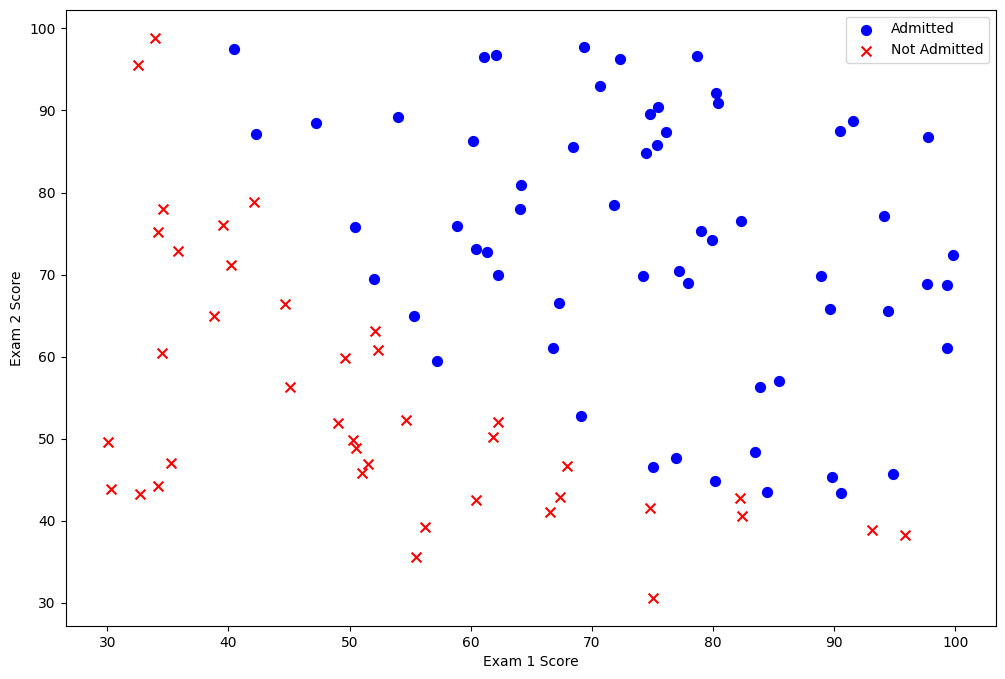

In [ ]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

From this plot we can see that there’s a nearly linear decision boundary. It curves a bit so we can’t classify all of the examples correctly using a straight line, but we should be able to get pretty close. Now we need to implement logistic regression so we can train a model to find the optimal decision boundary and make class predictions. The first step is to implement the sigmoid function.

def sigmoid(z):

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

This function is the “activation” function for the output of logistic regression. It converts a continuous input into a value between zero and one. This value can be interpreted as the class probability, or the likelihood that the input example should be classified positively. Using this probability along with a threshold value, we can obtain a discrete label prediction. It helps to visualize the function’s output to see what it’s really doing.

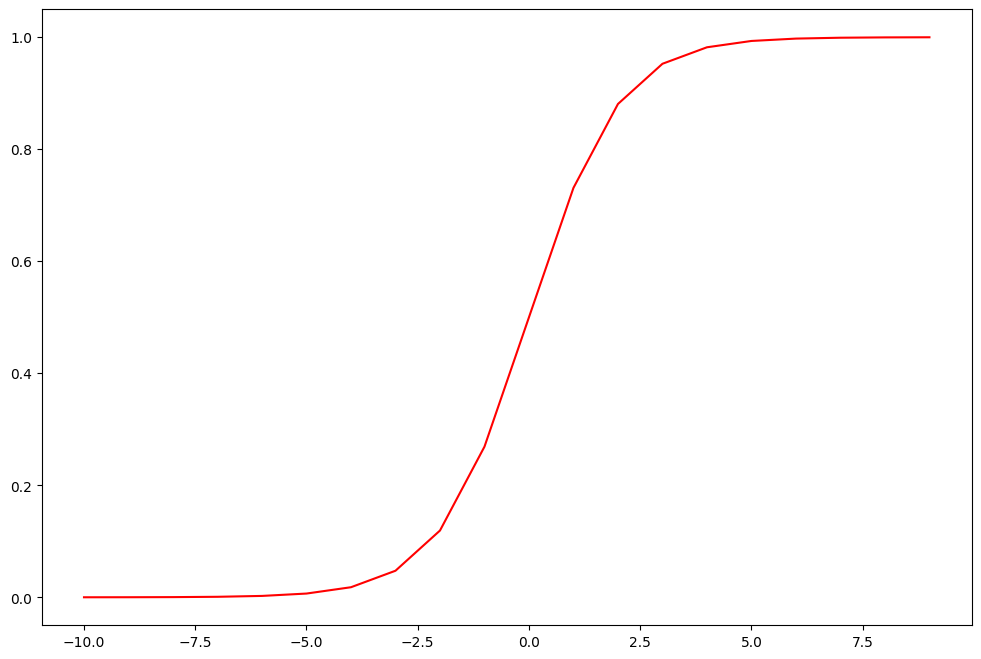

In [ ]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

Our next step is to write the cost function. Remember that the cost function evaluates the performance of the model on the training data given a set of model parameters. Here’s the cost function for logistic regression.

In [ ]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

Note that we reduce the output down to a single scalar value, which is the sum of the “error” quantified as a function of the difference between the class probability assigned by the model and the true label of the example. The implementation is completely vectorized – it’s computing the model’s predictions for the whole data set in one statement (sigmoid(X * theta.T)). If the math here isn’t making sense, refer to the exercise text I linked to above for a more detailed explanation.

We can test the cost function to make sure it’s working, but first we need to do some setup.

In [ ]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

I like to check the shape of the data structures I’m working with fairly often to convince myself that their values are sensible. This technique if very useful when implementing matrix multiplication.

In [ ]:
X.shape, theta.shape, y.shape


((100, 3), (3,), (100, 1))

Now let’s compute the cost for our initial solution given zeros for the model parameters, here represented as “theta”.

In [ ]:
cost(theta, X, y)


np.float64(0.6931471805599453)

Now that we have a working cost function, the next step is to write a function that computes the gradient of the model parameters to figure out how to change the parameters to improve the outcome of the model on the training data. Recall that with gradient descent we don’t just randomly jigger around the parameter values and see what works best. At each training iteration we update the parameters in a way that’s guaranteed to move them in a direction that reduces the training error (i.e. the “cost”). We can do this because the cost function is differentiable. The calculus involved in deriving the equation is well beyond the scope of this blog post, but the full equation is in the exercise text. Here’s the function.

In [ ]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

Note that we don't actually perform gradient descent in this function - we just compute a single gradient step. In the exercise, an Octave function called "fminunc" is used to optimize the parameters given functions to compute the cost and the gradients. Since we're using Python, we can use SciPy's optimization API to do the same thing.

In [ ]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
cost(result[0], X, y)

np.float64(0.20349770158947447)

We now have the optimal model parameters for our data set. Next we need to write a function that will output predictions for a dataset X using our learned parameters theta. We can then use this function to score the training accuracy of our classifier.

In [ ]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) / len(correct))
print('accuracy = {0}%'.format(accuracy))
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) / len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 0.89%
accuracy = 0.89%


Our logistic regression classifer correctly predicted if a student was admitted or not 89% of the time. Not bad! Keep in mind that this is training set accuracy though. We didn't keep a hold-out set or use cross-validation to get a true approximation of the accuracy so this number is likely higher than its true performance (this topic is covered in a later exercise).

**Regularized Logistic Regression**

Now that we have a working implementation of logistic regression, we'll going to improve the algorithm by adding regularization. Regularization is a term in the cost function that causes the algorithm to prefer "simpler" models (in this case, models will smaller coefficients). The theory is that this helps to minimize overfitting and improve the model's ability to generalize. We’ll apply our regularized version of logistic regression to a slightly more challenging problem. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a data set of test results on past microchips, from which you can build a logistic regression model.

Let's start by visualizing the data.

In [ ]:
data2= pd.read_csv('/content/drive/MyDrive/Courses /Data Science /Machine Learning/Theory /ML andrew/Dataset/ex2data2.txt',header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Text(0, 0.5, 'Test 2 Score')

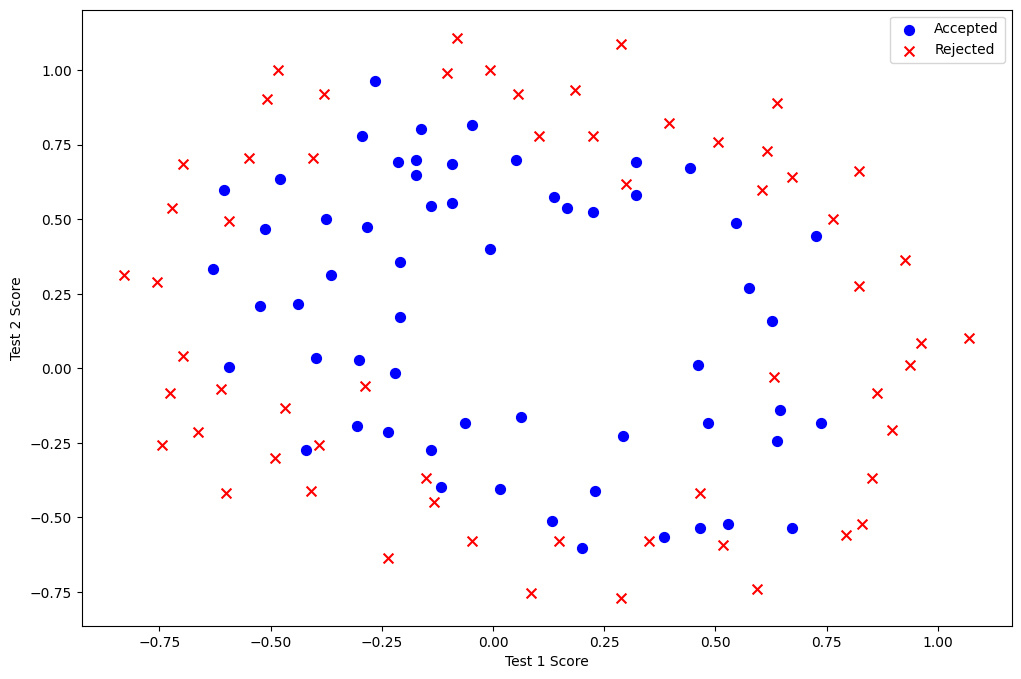

In [ ]:


positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

This data looks a bit more complicated than the previous example. In particular, you'll notice that there is no linear decision boundary that will perform well on this data. One way to deal with this using a linear technique like logistic regression is to construct features that are derived from polynomials of the original features. We can try creating a bunch of polynomial features to feed into the classifier.

In [ ]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


Now we need to modify the cost and gradient functions to include the regularization term. In each case, the regularizer is added on to the previous calculation. Here’s the updated cost function

In [ ]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

Notice that we’ve added a new variable called “reg” that is a function of the parameter values. As the parameters get larger, the penalization added to the cost function increases. Also note that we’ve added a new “learning rate” parameter to the function. This is also part of the regularization term in the equation. The learning rate gives us a new hyper-parameter that we can use to tune how much weight the regularization holds in the cost function.

Next we’ll add regularization to the gradient function.

In [ ]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])

    return grad

Just as with the cost function, the regularization term is added on to the original calculation. However, unlike the cost function, we included logic to make sure that the first parameter is not regularized. The intuition behind this decision is that the first parameter is considered the “bias” or “intercept” of the model and shouldn’t be penalized.

We can test out the new functions just as we did before.

In [ ]:
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

learningRate = 1

costReg(theta2, X2, y2, learningRate)

np.float64(0.6931471805599454)

We can also re-use the optimization code from earlier to find the optimal model parameters.



In [ ]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

<ipython-input-27-92e983cee313>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])


(array([ 1.22702480e-04,  7.19893533e-05, -3.74156020e-04, -1.44256518e-04,
         2.93168594e-05, -5.64160697e-05, -1.02826715e-04, -2.83150640e-04,
         6.47460472e-07, -1.99697745e-04, -1.68479401e-05]),
 97,
 1)

Finally, we can use the same method we applied earlier to create label predictions for the training data and evaluate the performance of the model.

In [ ]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) * 100 / len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 65.2542372881356%


accuracy = 91%

That's all for part 3! In the next post in the series we'll expand on our implementation of logistic regression to tackle multi-class image classification.

## **4.1-Logistic Regression with sample Example**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate a small dataset for illustration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X + np.random.randn(100, 1) > 5).astype(int)

# Add a bias term to the feature matrix
X_b = np.c_[np.ones((100, 1)), X]

In [ ]:
# Sigmoid (logistic) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Cost function for logistic regression
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -1/m * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost.item()

In [ ]:
# Gradient descent to update parameters
def gradient_descent(theta, X, y, learning_rate, n_iterations):
    m = len(y)
    costs = []

    for iteration in range(n_iterations):
        h = sigmoid(X.dot(theta))
        gradient = 1/m * X.T.dot(h - y)
        theta -= learning_rate * gradient
        cost = cost_function(theta, X, y)
        costs.append(cost)

    return theta, costs

In [ ]:
# Initialize parameters
theta_initial = np.random.randn(2, 1)


In [ ]:
# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000

In [ ]:
# Run gradient descent
theta_final, costs = gradient_descent(theta_initial, X_b, y, learning_rate, n_iterations)

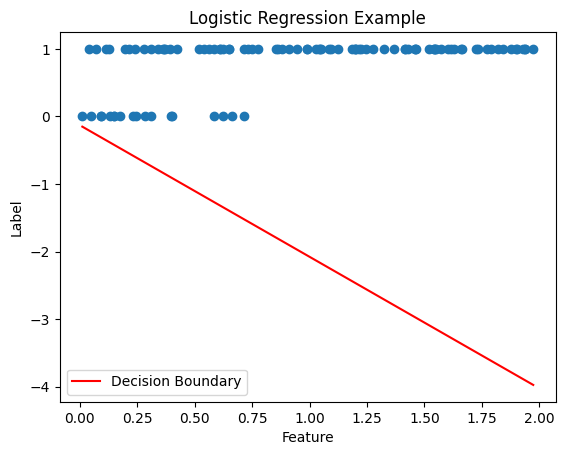

In [ ]:
# Plot the data points and decision boundary
plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("Label")
plt.title("Logistic Regression Example")
x_values = np.array([np.min(X), np.max(X)])
#y_values = -(theta_final[0] + theta_final[1] * x_values) / theta_final[2]
y_values = -(theta_final[0] + theta_final[1] * x_values)

plt.plot(x_values, y_values, label="Decision Boundary", color='red')
plt.legend()
plt.show()

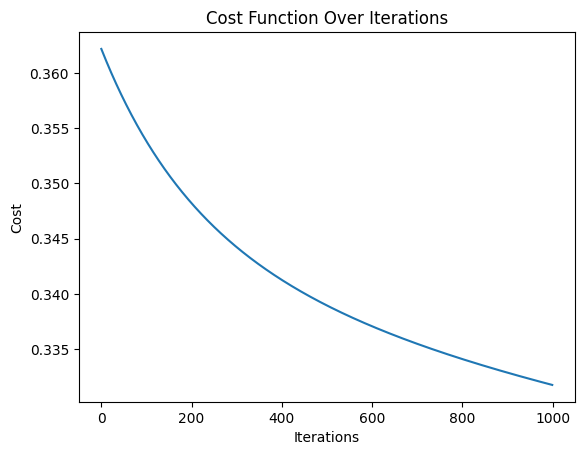

In [ ]:
# Plot the cost over iterations
plt.plot(range(n_iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.show()

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Chapter 4: Regularization**</p>

## **Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Train logistic regression models with and without regularization:

In [ ]:
# Logistic Regression without regularization (C is a large value)
model_no_reg = LogisticRegression(penalty='none', max_iter=10000)
model_no_reg.fit(X_train, y_train)
y_pred_no_reg = model_no_reg.predict(X_test)
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)

# Logistic Regression with L2 regularization (default)
model_l2_reg = LogisticRegression(penalty='l2', C=1.0, max_iter=10000)
model_l2_reg.fit(X_train, y_train)
y_pred_l2_reg = model_l2_reg.predict(X_test)
accuracy_l2_reg = accuracy_score(y_test, y_pred_l2_reg)

# Logistic Regression with L1 regularization
model_l1_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=10000)
model_l1_reg.fit(X_train, y_train)
y_pred_l1_reg = model_l1_reg.predict(X_test)
accuracy_l1_reg = accuracy_score(y_test, y_pred_l1_reg)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
print(f'Accuracy without regularization: {accuracy_no_reg:.2f}')
print(f'Accuracy with L2 regularization: {accuracy_l2_reg:.2f}')
print(f'Accuracy with L1 regularization: {accuracy_l1_reg:.2f}')

Accuracy without regularization: 0.95
Accuracy with L2 regularization: 0.98
Accuracy with L1 regularization: 0.98


## **linear Regression**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import fetch_california_housing # Use fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [ ]:
# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Linear Regression without regularization
model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)
y_pred_no_reg = model_no_reg.predict(X_test)
mse_no_reg = mean_squared_error(y_test, y_pred_no_reg)

# Linear Regression with L2 regularization (Ridge)
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Linear Regression with L1 regularization (Lasso)
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)


In [ ]:
print(f'Mean Squared Error without regularization: {mse_no_reg:.2f}')
print(f'Mean Squared Error with L2 regularization (Ridge): {mse_ridge:.2f}')
print(f'Mean Squared Error with L1 regularization (Lasso): {mse_lasso:.2f}')


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Chapter 5:Neural Networks**</p>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**⭐️Chapter: 2-Model selection**</p>

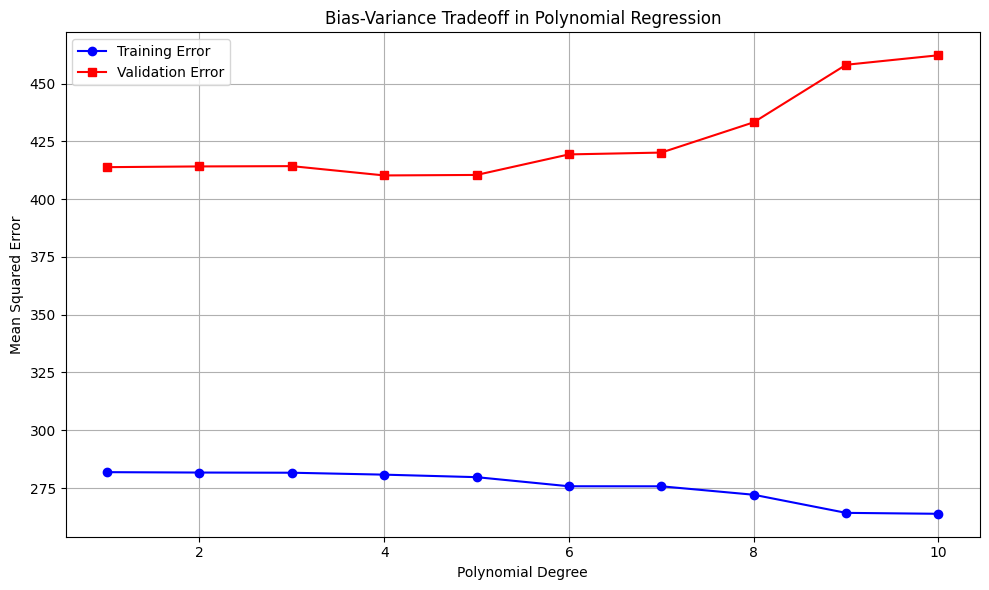

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Track errors
train_errors = []
val_errors = []
degrees = range(1, 11)  # Polynomial degrees from 1 to 10

for d in degrees:
    # Create polynomial regression pipeline
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate MSE for training and validation
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_errors.append(train_mse)
    val_errors.append(val_mse)

# Step 3: Plot errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, marker='o', label='Training Error', color='blue')
plt.plot(degrees, val_errors, marker='s', label='Validation Error', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff in Polynomial Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 What You’ll See

High Bias (Degrees 1-2): Both training and validation errors are high.

Ideal Fit (Degrees 3-4): Training error is low, and validation error is minimized.

High Variance (Degrees 6+): Training error continues to drop, but validation error increases—overfitting

# **References**
[1-Machine Learning Exercises In Python, Part 1](https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/)


[2-Hands-on ML with Scikit-Learn, Keras & TF by Aurelien Geron](https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/tree/master)